# Bank Customer Churn Prediction
#### About Dataset Context

It is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave bank or not.

#### Content

Various Bank detail is given like CustomerID , surname, Credit score and many more.

#### Acknowledgements

This dataset is originated from a U.S. bank .

#### Inspiration

Lets work together on this dataset and learn basic level of prediction using different libraries.

`RowNumber`: Row Number Of dataset

`CustomerId`: CustomerID is given

`Surname`: Surname of the customer

`CreditScore`: Credit Score of customer

`Geography`: location of customer

`CreditScore`: Credit Score of customer

`Gender`: Gender whether male or female

`Age`: Age of the customer

`Tenure`: From how many years customer is in bank

`Balance`: Average balance of customer

`NumOfProducts`: Number of bank product facilities customer is using

`HasCrCard`:If the customer has a Credit Card 

`IsActiveMember`: If the member is active in using the banking services

`EstimatedSalary`: Estimated Salary of the customer

`Exited`: Customer left the bank (Churn)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, classification_report, mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor, XGBClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing, svm, ensemble

# Import Data

In [2]:
df = pd.read_csv("Churn_Modelling.csv",sep = ',')
df_ml = df

## Show Data

In [3]:
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [4]:
df_ml

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [5]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.shape

(10000, 14)

In [8]:
df["Exited"].unique()

array([1, 0])

In [9]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Show all columns names

In [12]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# Pre-processing steps 
## Data Cleaning

## Check for NULL values

In [13]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Check for DUPLICATED values

In [14]:
df.duplicated().sum()

0

In [15]:
first_rows = df.head()


for column in first_rows.columns:
    column_values = first_rows [column]
    value = column_values. values[0]
    value_type = type(value).__name__
    print(f"Column: {column} - Value: {value} - Type: {value_type} \n")

Column: RowNumber - Value: 1 - Type: int64 

Column: CustomerId - Value: 15634602 - Type: int64 

Column: Surname - Value: Hargrave - Type: str 

Column: CreditScore - Value: 619 - Type: int64 

Column: Geography - Value: France - Type: str 

Column: Gender - Value: Female - Type: str 

Column: Age - Value: 42 - Type: int64 

Column: Tenure - Value: 2 - Type: int64 

Column: Balance - Value: 0.0 - Type: float64 

Column: NumOfProducts - Value: 1 - Type: int64 

Column: HasCrCard - Value: 1 - Type: int64 

Column: IsActiveMember - Value: 1 - Type: int64 

Column: EstimatedSalary - Value: 101348.88 - Type: float64 

Column: Exited - Value: 1 - Type: int64 



In [16]:
# Removing irrelevant columns such as name and customerid
df.drop(['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

# Mode - Median - Mean for Exited 

In [17]:
mode = df['Age'][df['Exited'] == 0].mode()[0]
mean = df['Age'][df['Exited'] == 0].mean()
median = df['Age'][df['Exited'] == 0].median()
mode_exit = df['Age'][df['Exited'] == 1].mode()[0]
mean_exit= df['Age'][df['Exited'] == 1].mean()
median_exit = df['Age'][df['Exited'] == 1].median()

print("-----------------------------------------------------")
print("|    Statistics    |  Exited = 0 |  Exited= 1       |")
print("-----------------------------------------------------")
print(f"| Mode             |  {mode:<9}  |  {mode_exit:<14}  |")
print(f"| Median           |  {median:<9}  |  {median_exit:<14}  |")
print(f"| Mean             |  {mean:<9.2f}  |  {mean_exit:<14.2f}  |")
print("-----------------------------------------------------")

-----------------------------------------------------
|    Statistics    |  Exited = 0 |  Exited= 1       |
-----------------------------------------------------
| Mode             |  35         |  46              |
| Median           |  36.0       |  45.0            |
| Mean             |  37.41      |  44.84           |
-----------------------------------------------------


# Data Transformation
## Encoding Categorical Variables

In [18]:
# Before
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
gender_counts = df['Gender'].value_counts()
print("Number of Male Customers:", gender_counts['Male'])
print("Number of Female Customers:", gender_counts['Female'])

Number of Male Customers: 5457
Number of Female Customers: 4543


In [20]:
# Perform binary encoding for 'Gender'
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [21]:
# After
df["Gender"].unique()

array([1, 0])

## Feature Engineering

In [22]:
# Create a new feature 'TenureAgeRatio'
df['TenureAgeRatio'] = df['Tenure'] / df['Age']
print(df.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France       1   42       2       0.00              1   
1          608     Spain       1   41       1   83807.86              1   
2          502    France       1   42       8  159660.80              3   
3          699    France       1   39       1       0.00              2   
4          850     Spain       1   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  TenureAgeRatio  
0          1               1        101348.88       1        0.047619  
1          0               1        112542.58       0        0.024390  
2          1               0        113931.57       1        0.190476  
3          0               0         93826.63       0        0.025641  
4          1               1         79084.10       0        0.046512  


In [23]:
df.info()
# Display unique values for the 'Exited', 'Geography', and 'Gender' columns
print(df["Exited"].unique())
print(df["Geography"].unique())
print(df["Gender"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  TenureAgeRatio   10000 non-null  float64
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB
[1 0]
['France' 'Spain' 'Germany']
[1 0]


# Graphs & Analysis

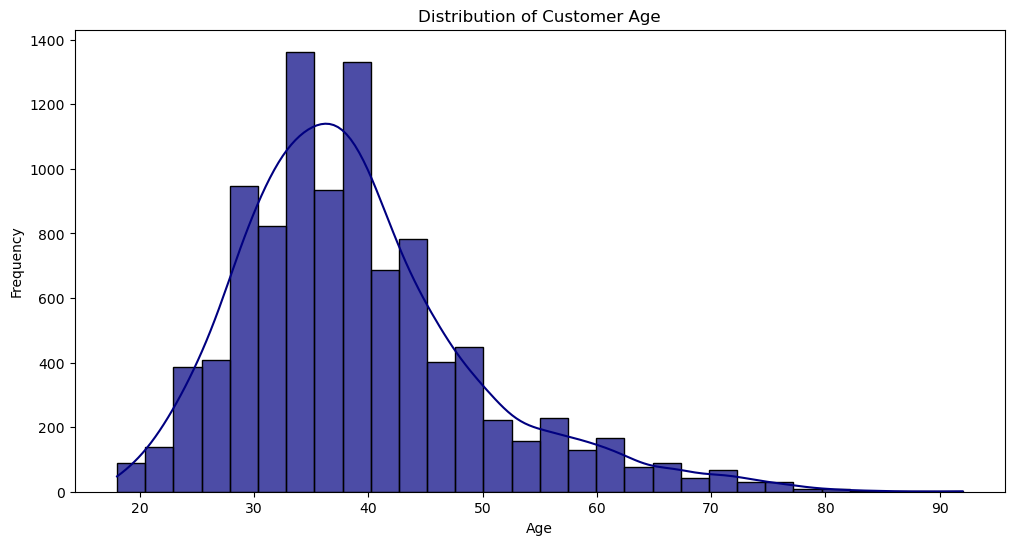

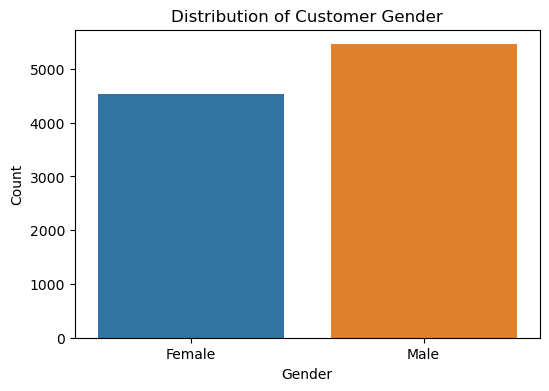

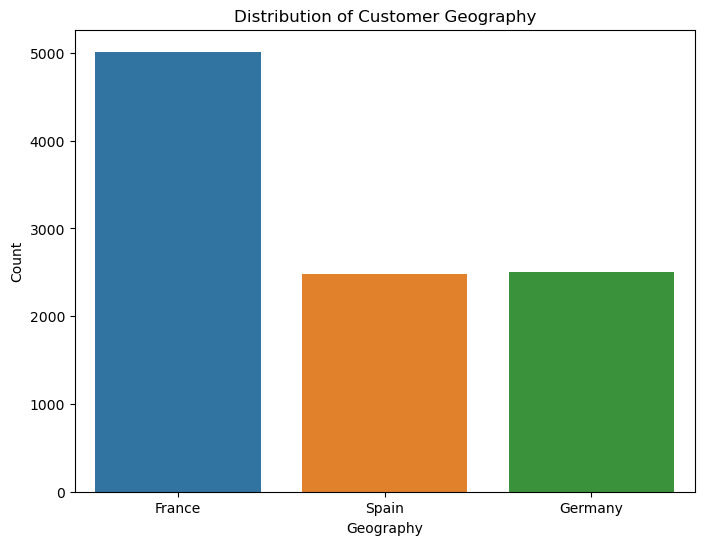

In [24]:
# Distribution of customer demographics
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='navy', alpha=0.7)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Perform binary encoding for 'Gender'
df['Gender'] = df['Gender'].map({0: 'Male', 1 : 'Female'})

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


# Perform binary encoding for 'Gender'
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Geography')
plt.title('Distribution of Customer Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()



### Calculate the number of customers in each country

In [25]:
country_counts = df['Geography'].value_counts()

print("Number of Customers in Each Country:")
print(country_counts)

Number of Customers in Each Country:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


<module 'matplotlib.pyplot' from '/Users/minaramses/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

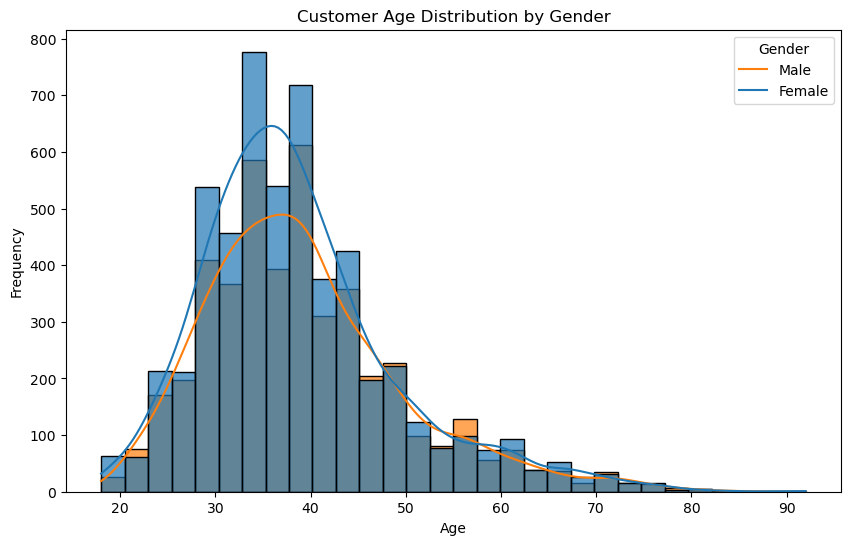

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Gender', bins=30, kde=True, alpha=0.7)
plt.title('Customer Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Gender', labels=['Male', 'Female'])  # Specify labels for the legend
plt


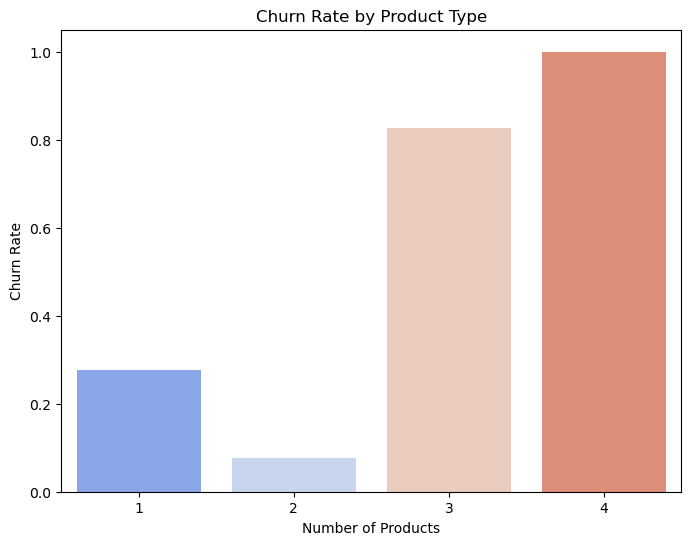

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='NumOfProducts', y='Exited', errorbar=None, palette='coolwarm')
plt.title('Churn Rate by Product Type')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.show()

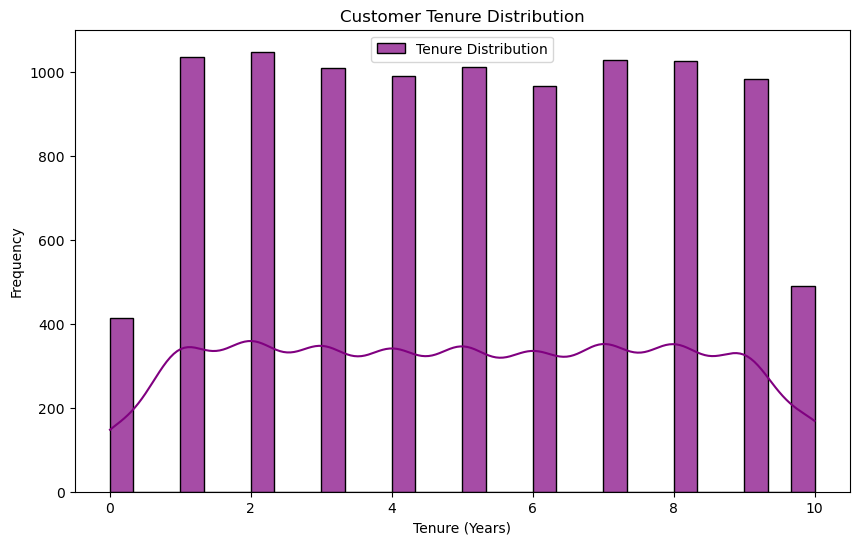

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Tenure', bins=30, kde=True, color='purple', alpha=0.7, label='Tenure Distribution')
plt.title('Customer Tenure Distribution')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


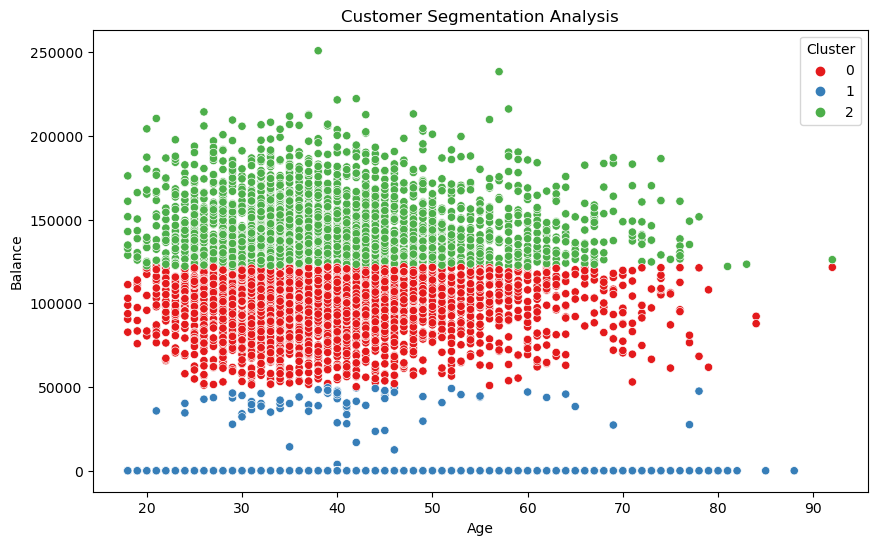

In [29]:
X = df[['Age', 'Balance']]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Balance', hue='Cluster', palette='Set1')
plt.title('Customer Segmentation Analysis')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend(title='Cluster')
plt.show()

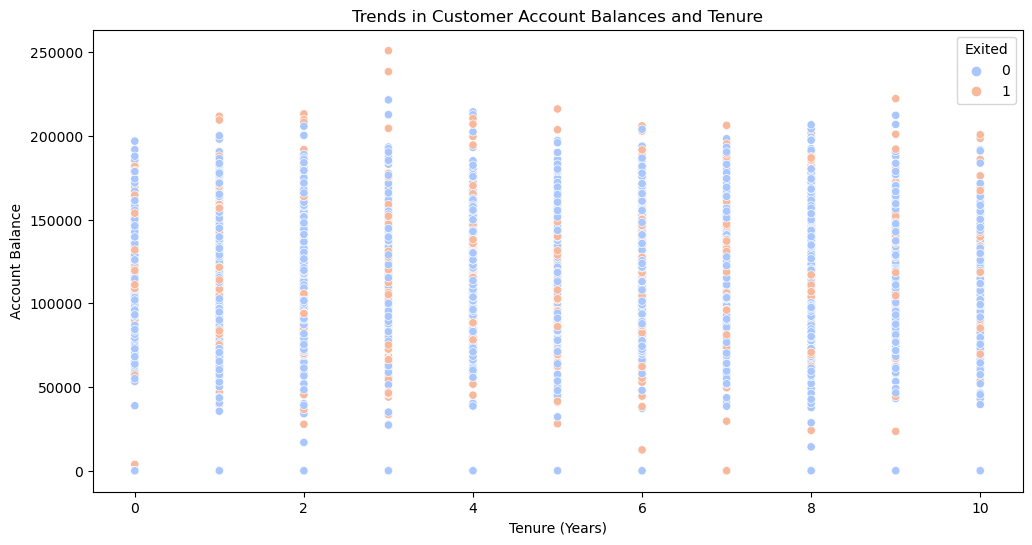

In [30]:
# Trends in customer account balances and tenure
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Tenure', y='Balance', hue='Exited', palette='coolwarm')
plt.title('Trends in Customer Account Balances and Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Account Balance')
plt.show()


# Correlations between different features

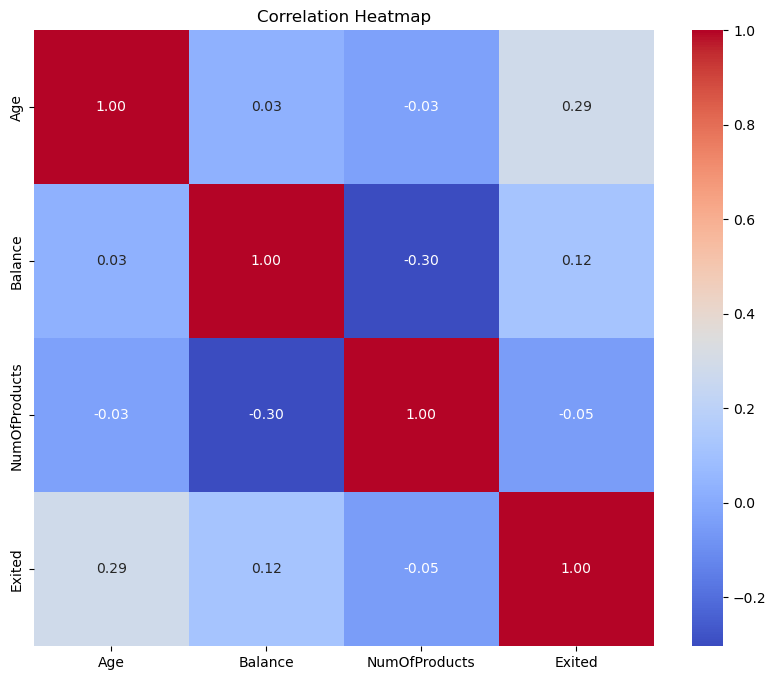

In [31]:
plt.figure(figsize=(10, 8))
corr = df[['Age', 'Balance', 'NumOfProducts', 'Exited']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [32]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)

q1_exit_0 = df['Age'][df['Exited'] == 0].quantile(0.25)
q3_exit_0 = df['Age'][df['Exited'] == 0].quantile(0.75)

q1_exit_1 = df['Age'][df['Exited'] == 1].quantile(0.25)
q3_exit_1 = df['Age'][df['Exited'] == 1].quantile(0.75)


print("Quartiles for Age Distribution when Exited = 0:")
print(f"Q1: {q1_exit_0}, Q3: {q3_exit_0}\n")

print("Quartiles for Age Distribution when Exited = 1:")
print(f"Q1: {q1_exit_1}, Q3: {q3_exit_1}")

Quartiles for Age Distribution when Exited = 0:
Q1: 31.0, Q3: 41.0

Quartiles for Age Distribution when Exited = 1:
Q1: 38.0, Q3: 51.0


## Bar Chart for all columns except (Balance, Estimated Salary and CreditScore) VS Exited 

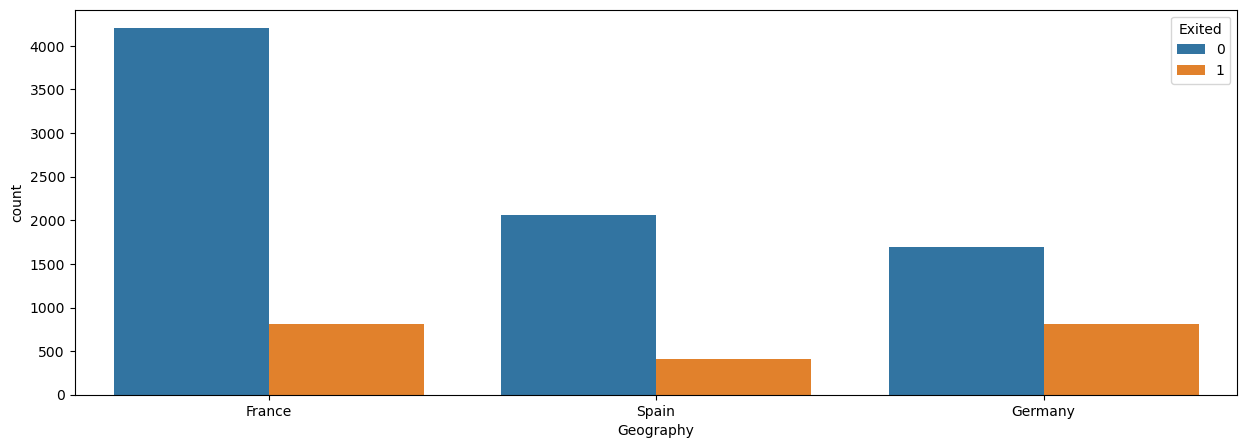

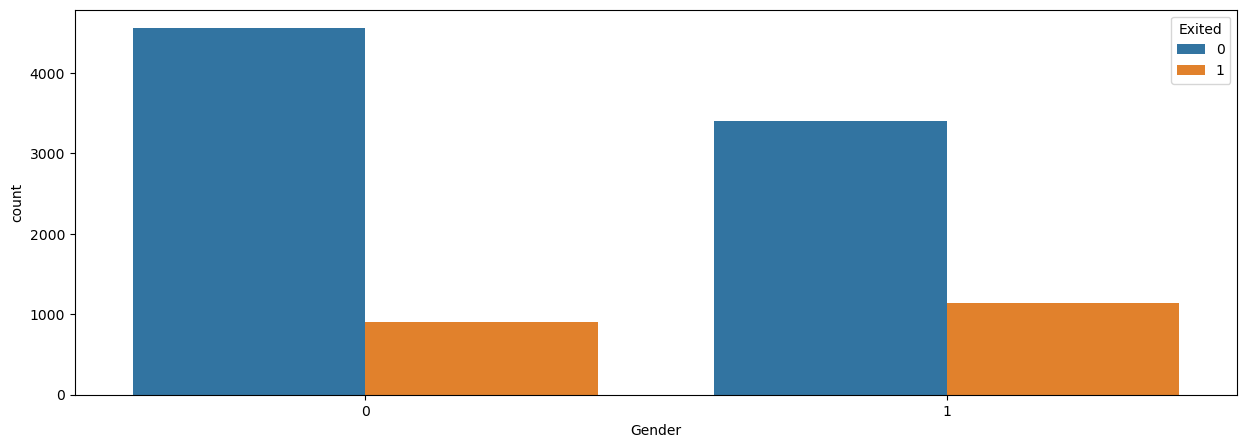

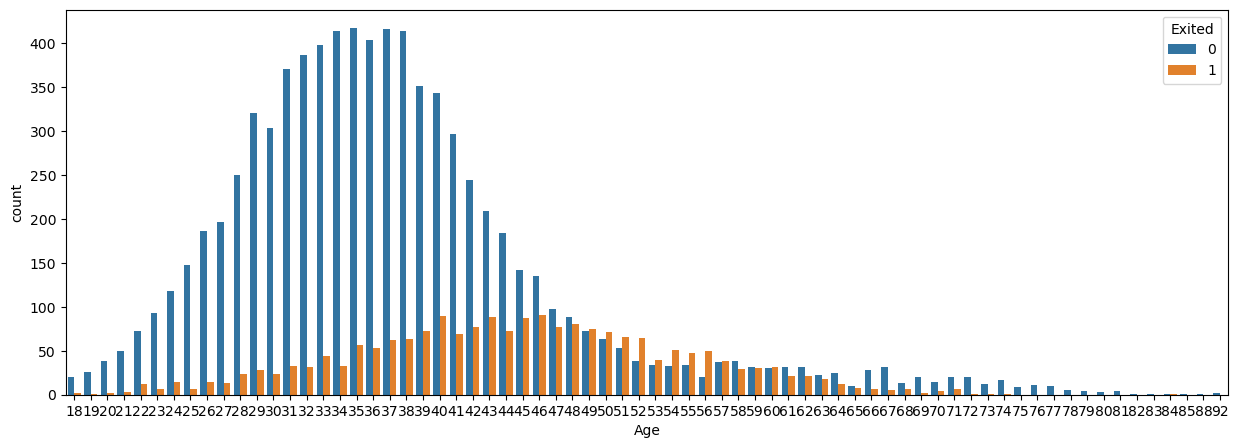

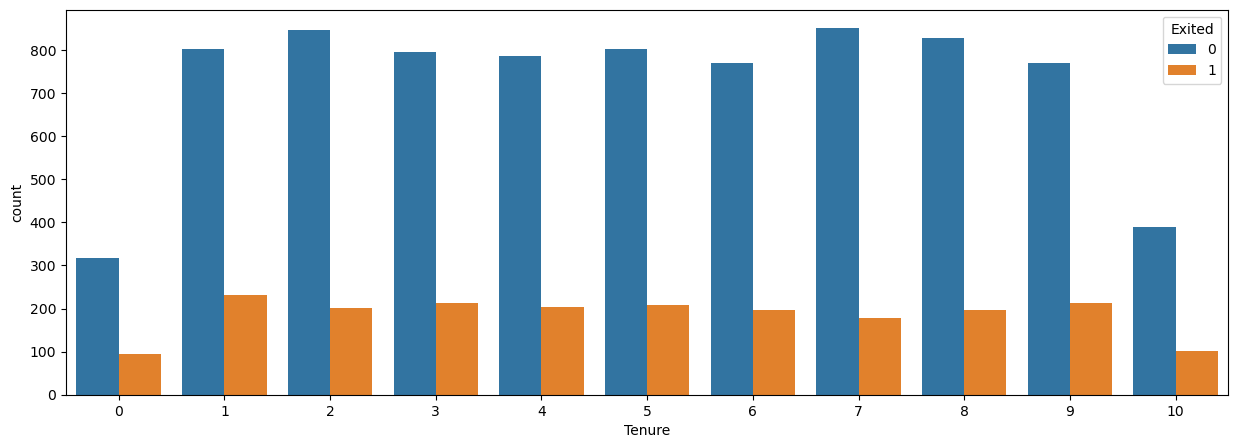

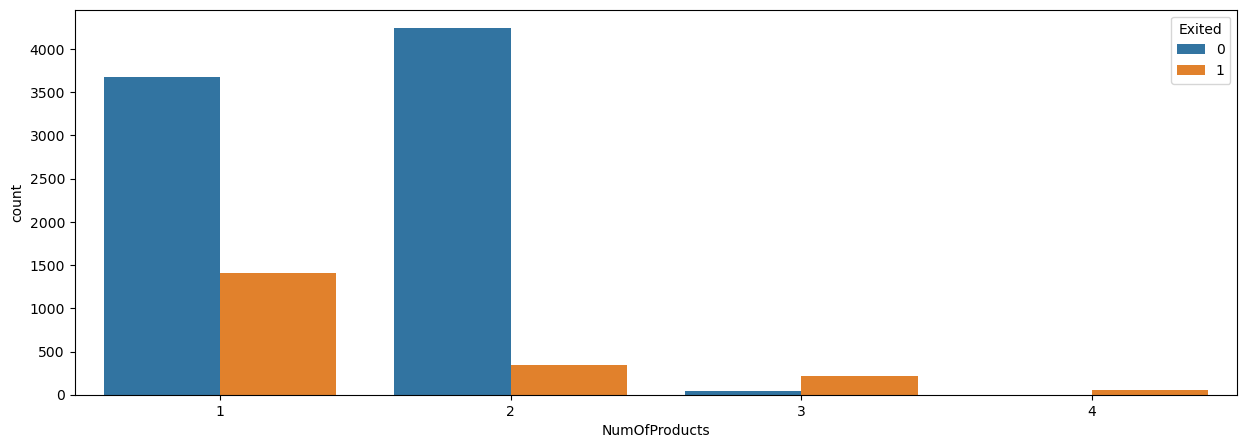

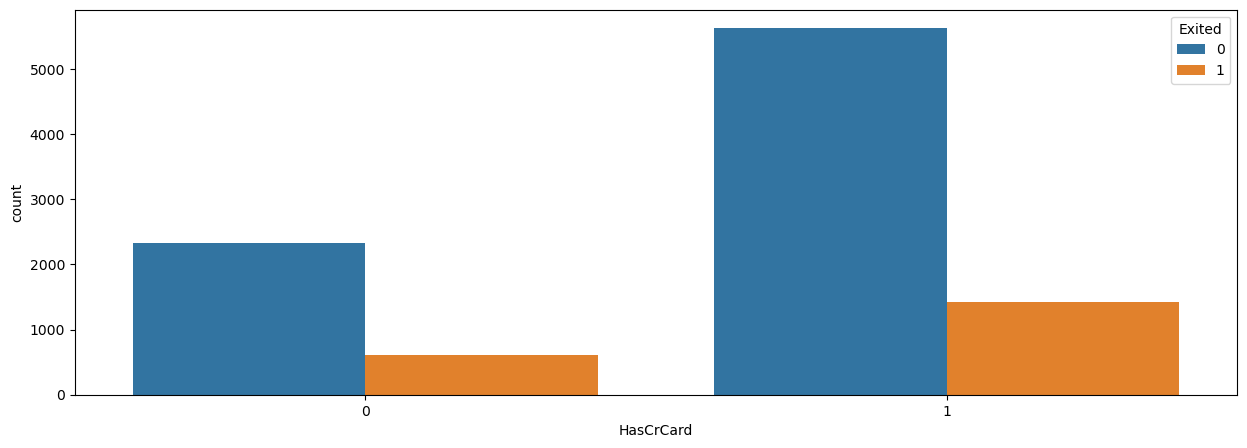

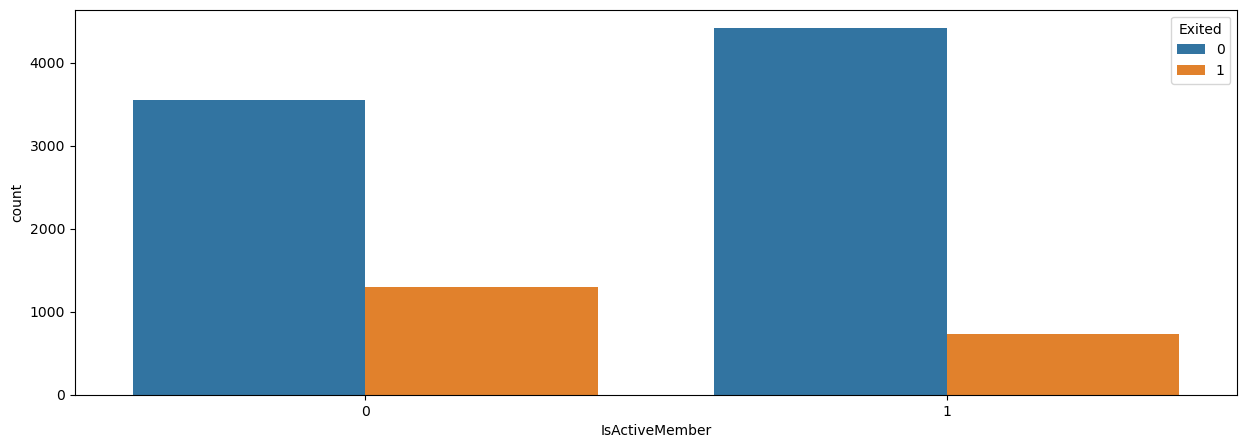

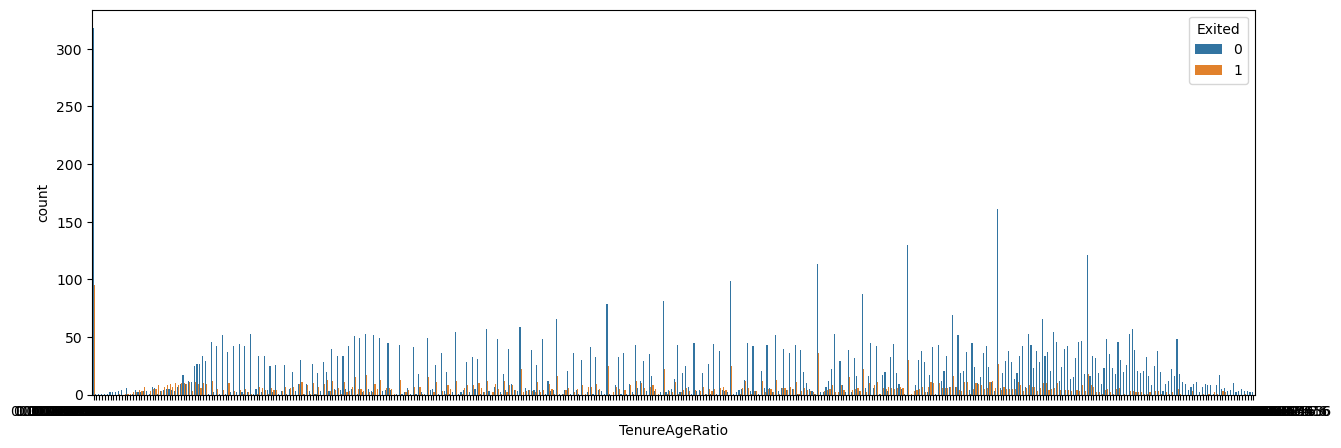

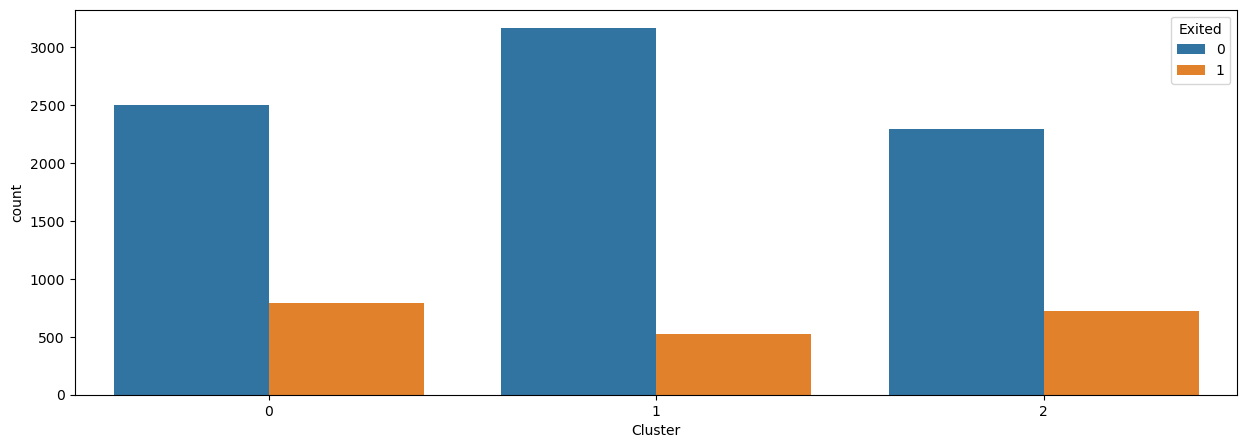

In [33]:
for i , c in enumerate(df.drop(columns=['Exited','Balance','EstimatedSalary','CreditScore'])):
    plt.figure(i, figsize=(15, 5))
    sns.countplot(data=df,x=c,hue='Exited')

# Mode, Mean and Median

In [34]:
mode = df['CreditScore'][df['Exited'] == 0].mode()[0]
mean = df['CreditScore'][df['Exited'] == 0].mean()
median = df['CreditScore'][df['Exited'] == 0].median()
mode_exit = df['CreditScore'][df['Exited'] == 1].mode()[0]
mean_exit= df['CreditScore'][df['Exited'] == 1].mean()
median_exit = df['CreditScore'][df['Exited'] == 1].median()

print("-----------------------------------------------------")
print("|    Statistics    |  Exited = 0 |  Exited= 1       |")
print("-----------------------------------------------------")
print(f"| Mode             |  {mode:<9}  |  {mode_exit:<14}  |")
print(f"| Median           |  {median:<9}  |  {median_exit:<14}  |")
print(f"| Mean             |  {mean:<9.2f}  |  {mean_exit:<14.2f}  |")
print("-----------------------------------------------------")

-----------------------------------------------------
|    Statistics    |  Exited = 0 |  Exited= 1       |
-----------------------------------------------------
| Mode             |  850        |  850             |
| Median           |  653.0      |  646.0           |
| Mean             |  651.85     |  645.35          |
-----------------------------------------------------


In [35]:
mode = df['EstimatedSalary'][df['Exited'] == 0].mode()[0]
mean = df['EstimatedSalary'][df['Exited'] == 0].mean()
median = df['EstimatedSalary'][df['Exited'] == 0].median()
mode_exit = df['EstimatedSalary'][df['Exited'] == 1].mode()[0]
mean_exit= df['EstimatedSalary'][df['Exited'] == 1].mean()
median_exit = df['EstimatedSalary'][df['Exited'] == 1].median()

print("-----------------------------------------------------")
print("|    Statistics    |  Exited = 0 |  Exited= 1       |")
print("-----------------------------------------------------")
print(f"| Mode             |  {mode:<9}  |  {mode_exit:<14}  |")
print(f"| Median           |  {median:<9}  |  {median_exit:<14.2f}  |")
print(f"| Mean             |  {mean:<9.2f}  |  {mean_exit:<14.2f}  |")
print("-----------------------------------------------------")

-----------------------------------------------------
|    Statistics    |  Exited = 0 |  Exited= 1       |
-----------------------------------------------------
| Mode             |  24924.92   |  11.58           |
| Median           |  99645.04   |  102460.84       |
| Mean             |  99738.39   |  101465.68       |
-----------------------------------------------------


## Estimated Salary Distribution for Exited and Not Exited

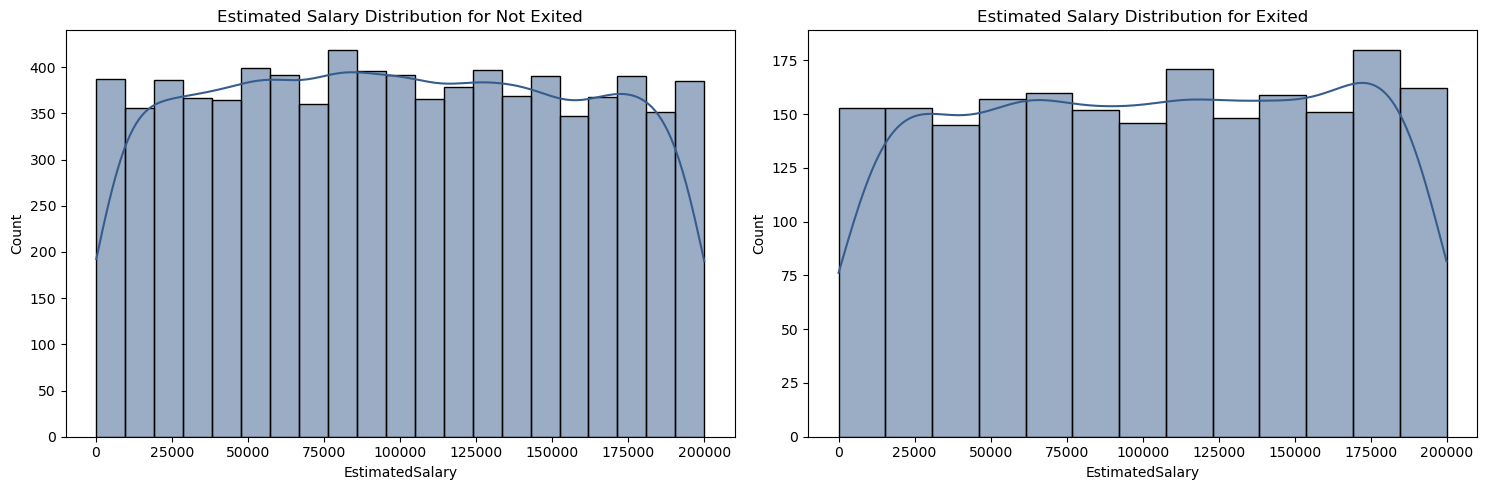

In [36]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.histplot(data=df.loc[df['Exited'] == 0], x="EstimatedSalary", kde=True, color=sns.color_palette("viridis")[1])
plt.title("Estimated Salary Distribution for Not Exited")

plt.subplot(1, 2, 2)
sns.histplot(data=df.loc[df['Exited'] == 1], x="EstimatedSalary", kde=True, color=sns.color_palette("viridis")[1])
plt.title("Estimated Salary Distribution for Exited")

plt.tight_layout()
plt.show()

In [37]:
# This is an error text to stop the code before doing ML

# STOP CODE

# Churn Count

In [38]:
churn_count = df[df['Exited'] == 1].groupby('Geography').size().reset_index(name='churn_count')

non_churn_count = df[df['Exited'] == 0].groupby('Geography').size().reset_index(name='non_churn_count')

combined_count = churn_count.merge(non_churn_count, on='Geography')

total_count = df['Geography'].value_counts().reset_index()
total_count.columns = ['Geography', 'total_count']
combined_count = combined_count.merge(total_count, on='Geography')
combined_count['churn_percentage'] = (combined_count['churn_count'] / combined_count['total_count']).round(4) * 100

combined_count

Geography  churn_count  non_churn_count  total_count  churn_percentage
0    France          810             4204         5014             16.15
1   Germany          814             1695         2509             32.44
2     Spain          413             2064         2477             16.67

In [39]:
df_ml.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France       1   42       2       0.00              1   
1          608     Spain       1   41       1   83807.86              1   
2          502    France       1   42       8  159660.80              3   
3          699    France       1   39       1       0.00              2   
4          850     Spain       1   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  TenureAgeRatio  Cluster  
0          1               1        101348.88       1        0.047619        1  
1          0               1        112542.58       0        0.024390        0  
2          1               0        113931.57       1        0.190476        2  
3          0               0         93826.63       0        0.025641        1  
4          1               1         79084.10       0        0.046512        2

In [40]:
df_ml['Geography'] = df_ml['Geography'].map({'France': 1, 'Germany': 2, 'Spain': 3})

In [41]:
print(df.columns)


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'TenureAgeRatio', 'Cluster'],
      dtype='object')


# Calculate correlation matrix

In [42]:
correlation_matrix = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'TenureAgeRatio']].corr()
print(correlation_matrix)


                 CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   
TenureAgeRatio      0.003732 -0.379205  0.888362 -0.027338       0.023576   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  \
CreditScore      -0.005458        0.025651        -0.001384 -0.027094   
Age   

# Checking the Relationship of Each Two Important Features

/Users/minaramses/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


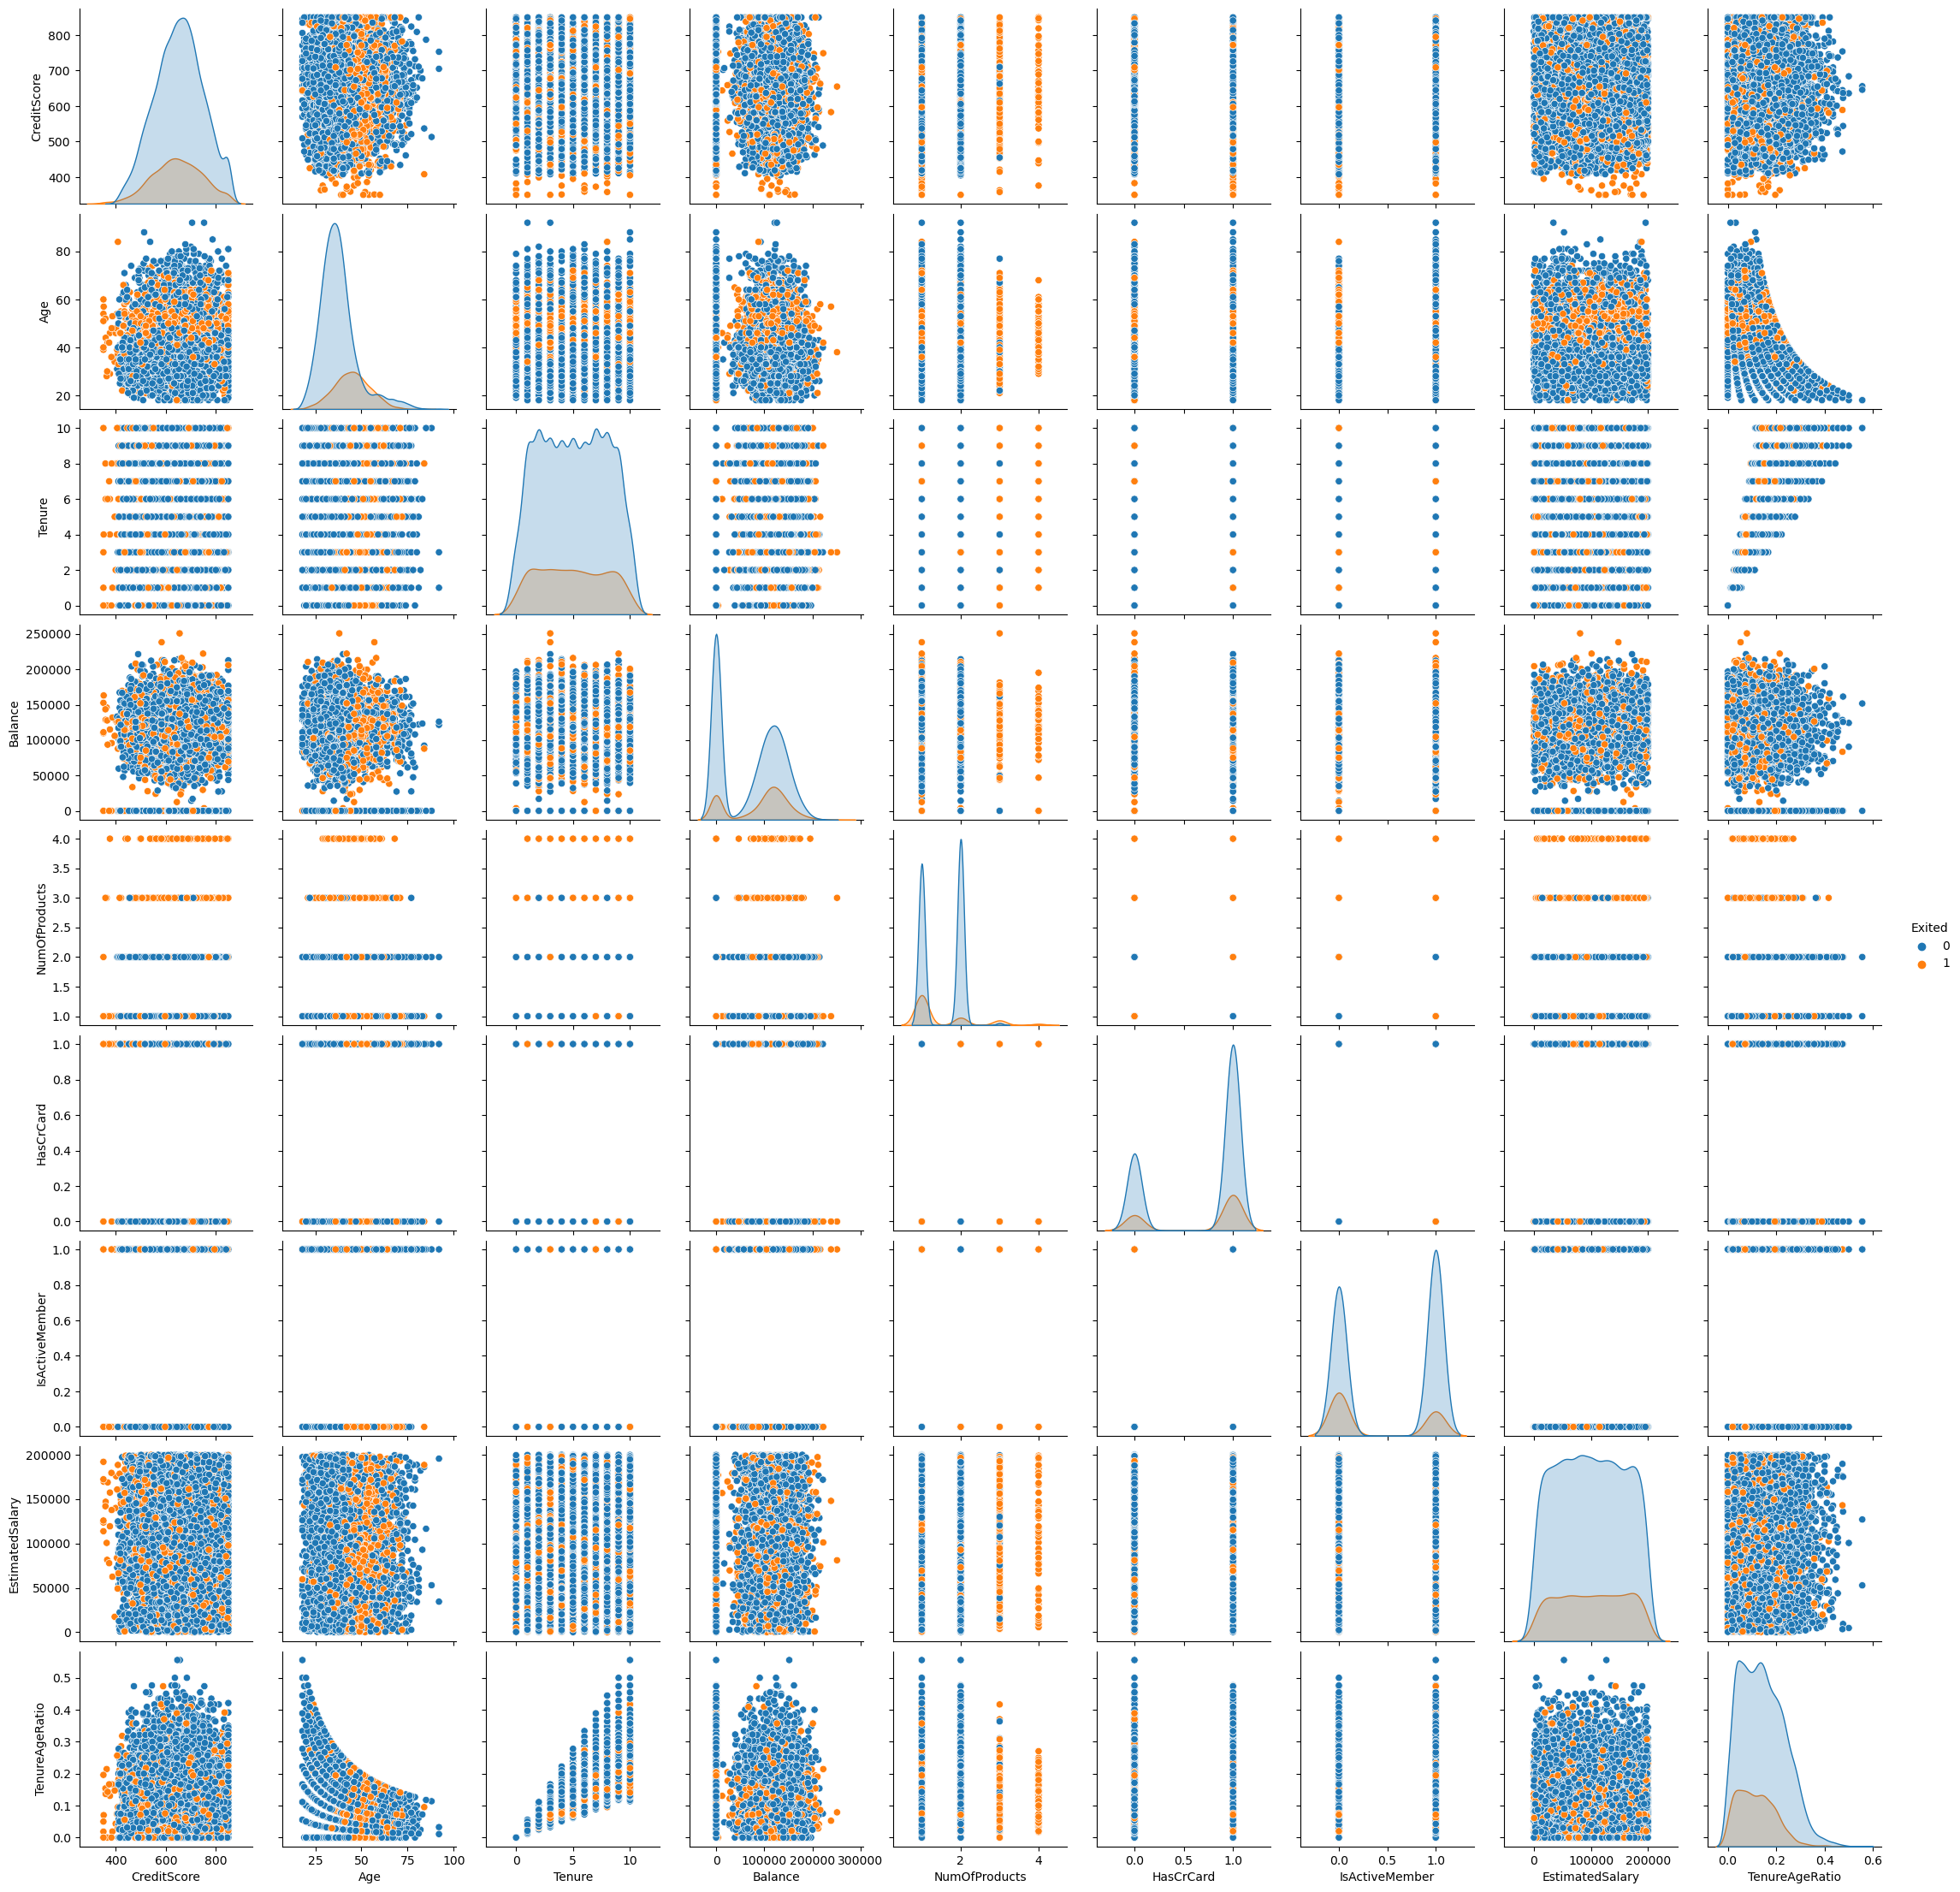

In [43]:
important_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'TenureAgeRatio']
sns.pairplot(df[important_features], hue='Exited', diag_kind='kde')
plt.show()


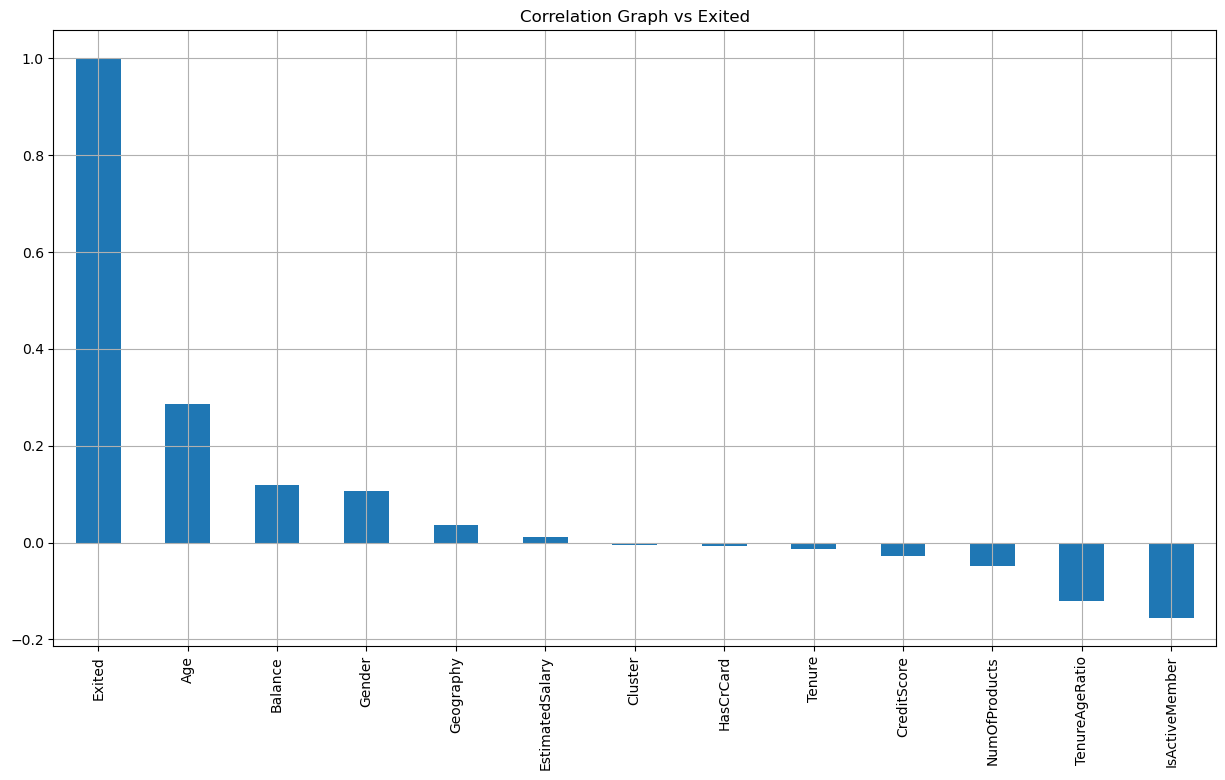

In [44]:
plt.figure(figsize=(15,8))
df.corr()['Exited'].sort_values(ascending =False).plot(kind='bar',title='Correlation Graph vs Exited')
plt.grid()

## Calculate the correlation of each feature with 'Exited' and sort in descending order

In [45]:
correlation_with_exited = df.corr()['Exited'].sort_values(ascending=False)
print("Correlation of each feature with 'Exited':")
print(correlation_with_exited)


Correlation of each feature with 'Exited':
Exited             1.000000
Age                0.285323
Balance            0.118533
Gender             0.106512
Geography          0.035943
EstimatedSalary    0.012097
Cluster           -0.004994
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
TenureAgeRatio    -0.121641
IsActiveMember    -0.156128
Name: Exited, dtype: float64


# MACHINE LEARNING
## Trainning different ML technique

# Random Forest

In [46]:
X = df_ml.drop(columns=['Exited']) 
y = df_ml['Exited'] 

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.864
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.45      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

Confusion Matrix:
[[1550   57]
 [ 215  178]]


# Decision Tree

In [47]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Generate a classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Generate a confusion matrix
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.791
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1607
           1       0.47      0.52      0.49       393

    accuracy                           0.79      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000

Decision Tree Confusion Matrix:
[[1378  229]
 [ 189  204]]


# XGBoost

In [48]:
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier()

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

# Generate a classification report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Generate a confusion matrix
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8585
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.69      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

XGBoost Confusion Matrix:
[[1516   91]
 [ 192  201]]


# Calculating TP, TN, FP, FN, F1, Recall, Precision

## Random Forest

In [49]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()

# Calculate Precision, Recall, and F1-score
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Display the results
print("Random Forest Metrics:")
print("True Positives:", tp_rf)
print("True Negatives:", tn_rf)
print("False Positives:", fp_rf)
print("False Negatives:", fn_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)


Random Forest Metrics:
True Positives: 179
True Negatives: 1556
False Positives: 51
False Negatives: 214
Precision: 0.7782608695652173
Recall: 0.455470737913486
F1-score: 0.5746388443017656


## Decision Tree Classifier

In [50]:
# Calculate the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn_dt, fp_dt, fn_dt, tp_dt = cm_dt.ravel()

# Calculate Precision, Recall, and F1-score
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Display the results
print("Decision Tree Metrics:")
print("True Positives:", tp_dt)
print("True Negatives:", tn_dt)
print("False Positives:", fp_dt)
print("False Negatives:", fn_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)


Decision Tree Metrics:
True Positives: 204
True Negatives: 1378
False Positives: 229
False Negatives: 189
Precision: 0.47113163972286376
Recall: 0.5190839694656488
F1-score: 0.4939467312348668


## XGBoost Classifier

In [51]:
# Calculate the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
tn_xgb, fp_xgb, fn_xgb, tp_xgb = cm_xgb.ravel()

# Calculate Precision, Recall, and F1-score
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Display the results
print("XGBoost Metrics:")
print("True Positives:", tp_xgb)
print("True Negatives:", tn_xgb)
print("False Positives:", fp_xgb)
print("False Negatives:", fn_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-score:", f1_xgb)


XGBoost Metrics:
True Positives: 201
True Negatives: 1516
False Positives: 91
False Negatives: 192
Precision: 0.6883561643835616
Recall: 0.5114503816793893
F1-score: 0.5868613138686131


# ROC Plot and Score
### Plot all 3 MLs ROC AUC in a single graph

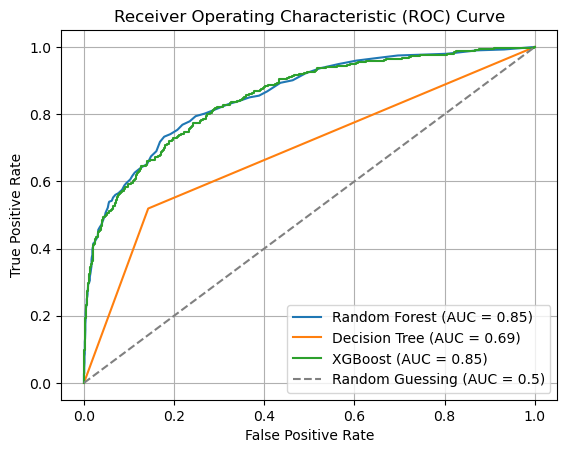

In [52]:
# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])
auc_rf = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:,1])

# Plot ROC curve for Random Forest
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Calculate ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:,1])
auc_dt = roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:,1])

# Plot ROC curve for Decision Tree
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')

# Calculate ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_classifier.predict_proba(X_test)[:,1])
auc_xgb = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:,1])

# Plot ROC curve for XGBoost
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Plot ROC curve for random guessing (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing (AUC = 0.5)', color='gray')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


## Print out the ROC AUC scores

In [53]:
print("ROC AUC for Random Forest:", auc_rf)
print("ROC AUC for Decision Tree:", auc_dt)
print("ROC AUC for XGBoost:", auc_xgb)

ROC AUC for Random Forest: 0.8546815696594574
ROC AUC for Decision Tree: 0.6882912068859046
ROC AUC for XGBoost: 0.8509209865869899


# Comparison Between Different Machine Learning with Graphs

## Calculate metrics for each model

In [54]:
models = ['Random Forest', 'Decision Tree', 'XGBoost']
accuracy = [accuracy_score(y_test, model.predict(X_test)) for model in [rf_classifier, dt_classifier, xgb_classifier]]
precision = [precision_score(y_test, model.predict(X_test)) for model in [rf_classifier, dt_classifier, xgb_classifier]]
recall = [recall_score(y_test, model.predict(X_test)) for model in [rf_classifier, dt_classifier, xgb_classifier]]
f1 = [f1_score(y_test, model.predict(X_test)) for model in [rf_classifier, dt_classifier, xgb_classifier]]

## Plot bar plots for accuracy, precision, recall, and F1-score

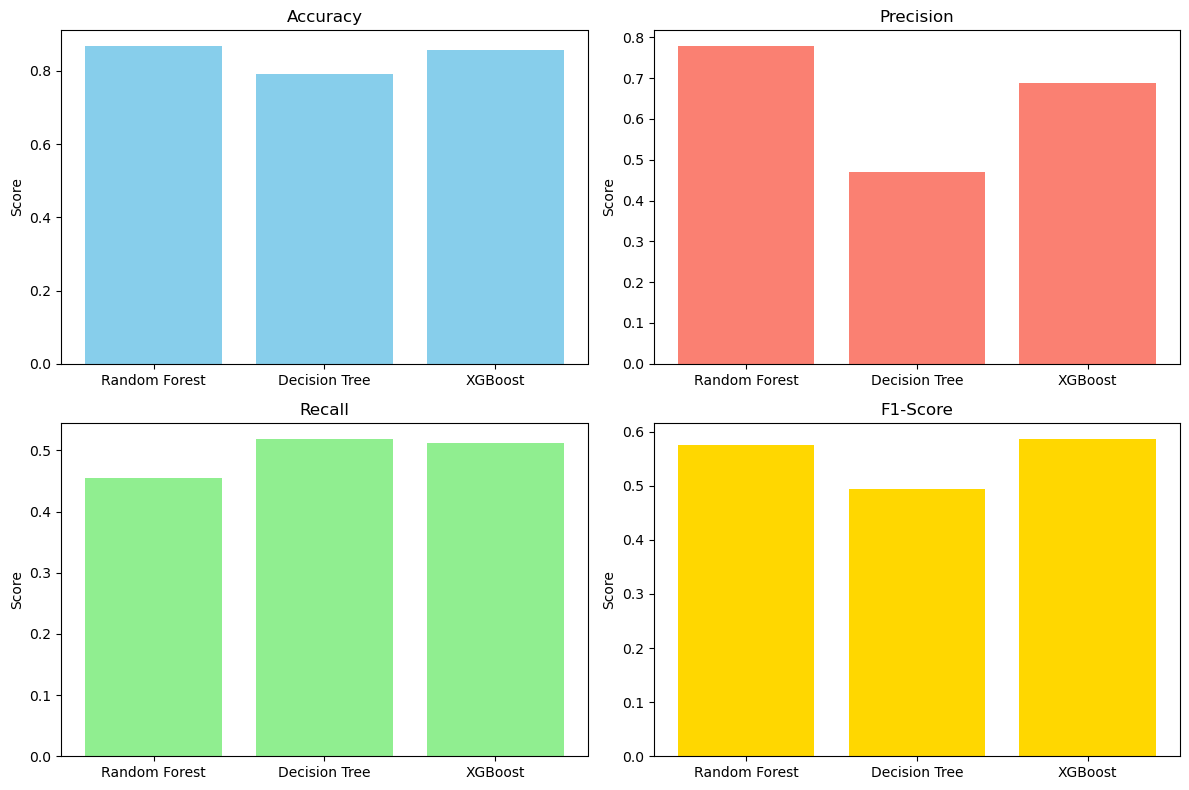

In [55]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(models, accuracy, color='skyblue')
plt.title('Accuracy')
plt.ylabel('Score')

plt.subplot(2, 2, 2)
plt.bar(models, precision, color='salmon')
plt.title('Precision')
plt.ylabel('Score')

plt.subplot(2, 2, 3)
plt.bar(models, recall, color='lightgreen')
plt.title('Recall')
plt.ylabel('Score')

plt.subplot(2, 2, 4)
plt.bar(models, f1, color='gold')
plt.title('F1-Score')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

## Metrics Data
### Entered the data manually

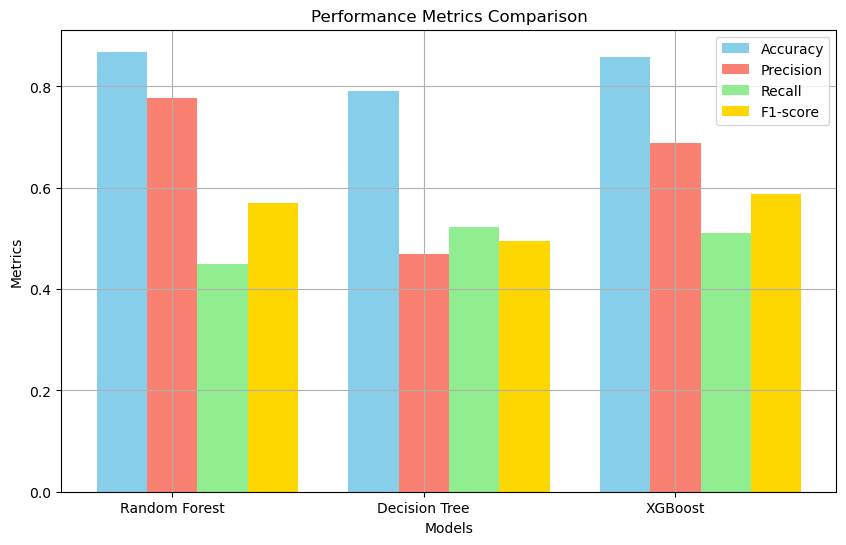

In [56]:
models = ['Random Forest', 'Decision Tree', 'XGBoost']
accuracy = [0.8685, 0.79, 0.8585]
precision = [0.7763, 0.4691, 0.6884]
recall = [0.4504, 0.5216, 0.5115]
f1 = [0.5700, 0.4940, 0.5869]

# Plotting
plt.figure(figsize=(10, 6))

# Accuracy
plt.bar([i-0.2 for i in range(len(models))], accuracy, color='skyblue', width=0.2, label='Accuracy')
# Precision
plt.bar([i for i in range(len(models))], precision, color='salmon', width=0.2, label='Precision')
# Recall
plt.bar([i+0.2 for i in range(len(models))], recall,color= 'lightgreen', width=0.2, label='Recall')
# F1-score
plt.bar([i+0.4 for i in range(len(models))], f1, color='gold', width=0.2, label='F1-score')

plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Performance Metrics Comparison')
plt.xticks(range(len(models)), models)
plt.legend()
plt.grid(True)
plt.show()


## Plot confusion matrices for each model

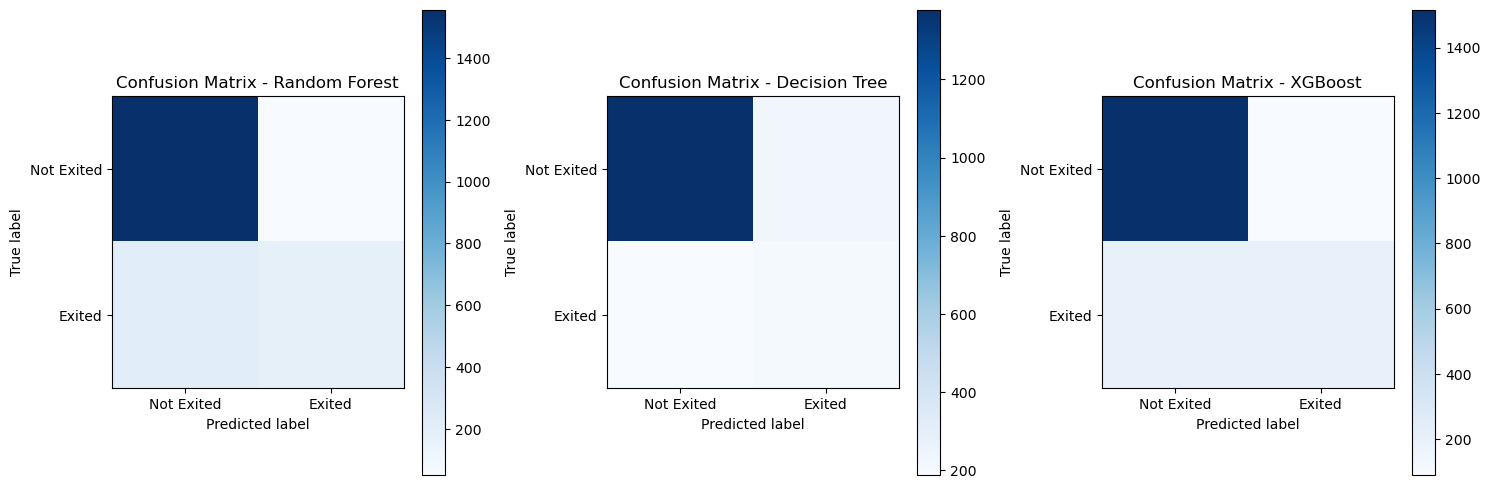

In [57]:
plt.figure(figsize=(15, 5))
for i, model in enumerate([rf_classifier, dt_classifier, xgb_classifier], 1):
    plt.subplot(1, 3, i)
    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {models[i-1]}')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, ['Not Exited', 'Exited'])
    plt.yticks(tick_marks, ['Not Exited', 'Exited'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.tight_layout()
plt.show()

## Plot precision-recall curves for each model

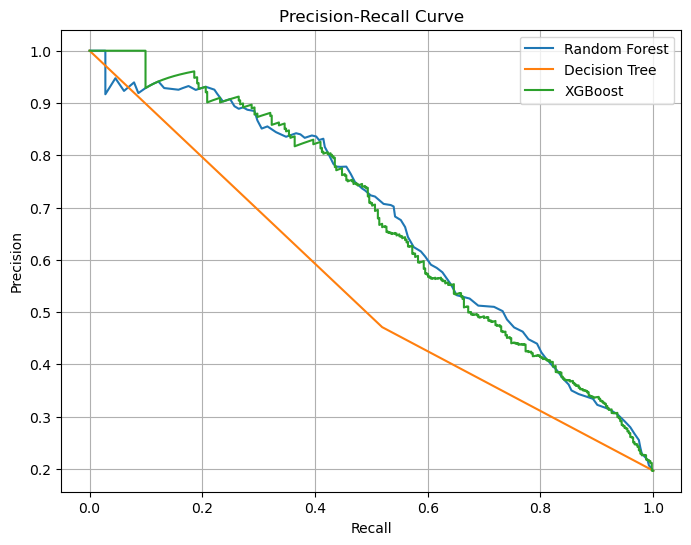

In [58]:
plt.figure(figsize=(8, 6))
for model, name in zip([rf_classifier, dt_classifier, xgb_classifier], models):
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(recall, precision, label=name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

## Plot F1-score curves for each model

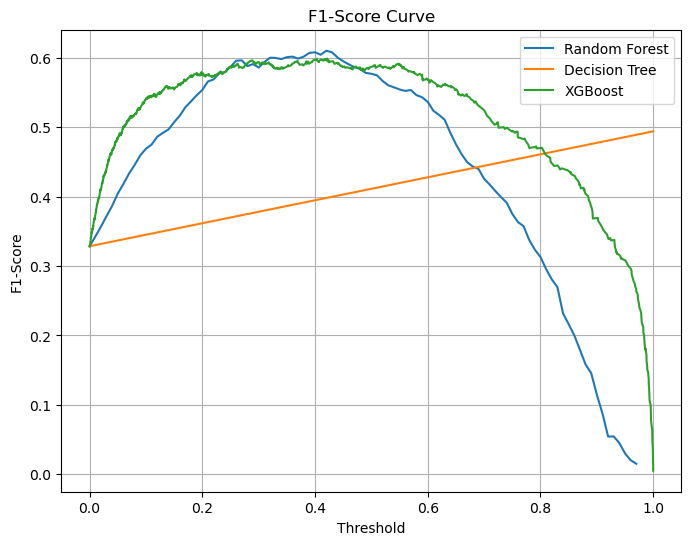

In [59]:
plt.figure(figsize=(8, 6))
for model, name in zip([rf_classifier, dt_classifier, xgb_classifier], models):
    precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    f1 = 2 * (precision * recall) / (precision + recall)
    plt.plot(thresholds, f1[:-1], label=name)

plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('F1-Score Curve')
plt.legend()
plt.grid(True)
plt.show()


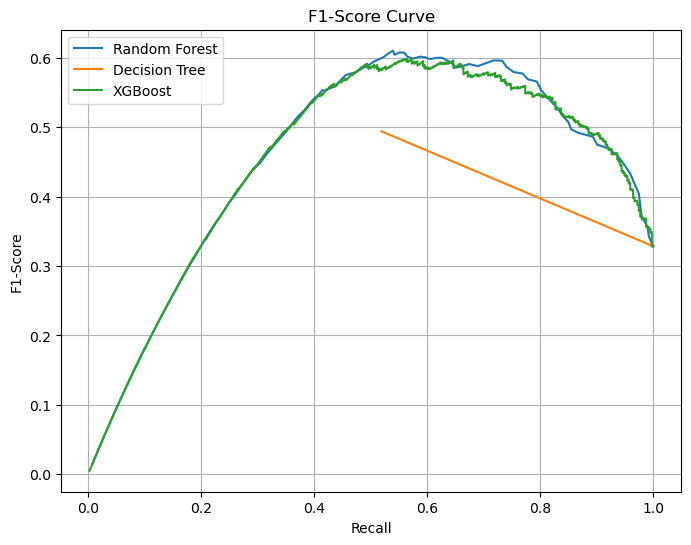

In [60]:
# Plot F1-score curves for each model
plt.figure(figsize=(8, 6))
for model, name in zip([rf_classifier, dt_classifier, xgb_classifier], models):
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    f1 = 2 * (precision * recall) / (precision + recall)
    plt.plot(recall[:-1], f1[:-1], label=name)  # Use recall[:-1] instead of recall

plt.xlabel('Recall')
plt.ylabel('F1-Score')
plt.title('F1-Score Curve')
plt.legend()
plt.grid(True)
plt.show()
